In [1]:
import numpy
from urllib.request import urlopen
import scipy.optimize
import random
from collections import defaultdict
import string
import gzip
import pandas as pd
import sklearn
from sklearn import linear_model
import json

In [2]:
import pandas as pd
data = pd.read_csv('USvideos.csv', error_bad_lines=False)
gbdata = pd.read_csv('GBvideos.csv', error_bad_lines=False)


In [ ]:
title = data['title']
gbtitle = gbdata['title']
titles = title.tolist()
gbtitles = gbtitle.tolist()

In [ ]:
tags = data['tags']. tolist()
gbtags = gbdata['tags'].tolist()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(titles)
gb_titles = vectorizer.fit_transform(gbtitles)

In [ ]:
tag_x = vectorizer.fit_transform(tags)
x_gb_tag = vectorizer.fit_transform(gbtags)

In [ ]:
import pandas as pd
data = pd.read_csv('USvideos.csv', error_bad_lines=False)
def convert_trending_date(string):
    temp = string.split('.')
    return temp[1]+'/'+temp[2]+'/20'+temp[0]
data['trending_date']=data['trending_date'].apply(convert_trending_date)
data['trending_date']=pd.to_datetime(data['trending_date'],infer_datetime_format=True)
def convert_publish_time(string):
    temp = string.split('-')
    time_val = temp[1]+'/'+temp[0]
    time_val = temp[2].split('T')[0]+'/'+time_val+' '+temp[2].split('T')[1].split('.')[0]
    return time_val
data['publish_time']=pd.to_datetime(data['publish_time'].apply(convert_publish_time))
days_since = {}
for group, table in data.groupby('video_id'):
    idx = 0
    for row in table.index:
        days_since[row] = idx
        idx+=1
day_lst = []
for i in sorted(days_since.keys()):
    day_lst.append(days_since[i])
data['days_trending'] = day_lst

In [22]:
group_data_gb = gbdf.groupby('category_id').mean()
group_data_gb

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Autos & Vehicles,Comedy,Education,...,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events,descr_len
category_id,,,,,,,,,,,,,,,,,,,,,
Autos & Vehicles,1.487392e+06,24608.506944,1952.708333,3507.534722,0.055556,0.000000,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,668.993056
Comedy,2.167430e+06,78431.168490,2533.107768,9145.960613,0.000000,0.000000,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,1030.730300
Education,9.721894e+05,38440.687090,1297.927790,3581.844639,0.017505,0.000000,0.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,1370.334792
Entertainment,3.264608e+06,81572.362012,9656.526852,12812.082420,0.029921,0.005261,0.003836,0,0,0,...,0,0,0,0,0,0,0,0,0,903.957238
Film & Animation,3.245133e+06,57205.523089,2403.156383,6049.674428,0.041133,0.046954,0.004657,0,0,0,...,0,0,0,0,0,0,0,0,0,809.798826
Gaming,9.768566e+05,39220.127517,1288.846756,3449.101790,0.037472,0.006711,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,799.340148
Howto & Style,6.173004e+05,26639.183091,833.606328,3815.506224,0.000000,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1484.243623
Music,1.244444e+07,272138.508943,11587.191799,21303.849062,0.002545,0.002108,0.001600,0,0,0,...,1,0,0,0,0,0,0,0,0,823.225802
News & Politics,1.150311e+06,25021.685714,3085.999184,7662.533878,0.027755,0.000000,0.000000,0,0,0,...,0,1,0,0,0,0,0,0,0,818.616838


In [21]:
group_data = df.groupby('category_id').mean()
group_data

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Autos & Vehicles,Comedy,Education,...,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events,descr_len
category_id,,,,,,,,,,,,,,,,,,,,,
Autos & Vehicles,1.355965e+06,11056.395833,632.838542,2042.830729,0.013021,0.026042,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,764.485488
Comedy,1.480308e+06,62582.223315,2091.521840,6521.718831,0.000579,0.000000,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,1018.532751
Education,7.129408e+05,29745.031401,816.408213,3286.378019,0.004831,0.003019,0.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,1501.812424
Entertainment,2.067883e+06,53243.325070,4314.297772,7383.229426,0.019671,0.003011,0.000803,0,0,0,...,0,0,0,0,0,0,0,0,0,1083.509828
Film & Animation,3.106250e+06,70787.836247,2590.681450,7627.744136,0.011940,0.005970,0.005544,0,0,0,...,0,0,0,0,0,0,0,0,0,1050.966239
Gaming,2.620831e+06,84502.183599,11241.696450,18042.488372,0.009792,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,798.528020
Howto & Style,9.837301e+05,39286.076942,1320.284370,5583.586589,0.002653,0.002653,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1392.741546
Music,6.201003e+06,218918.199011,7907.757726,19359.764524,0.001391,0.003708,0.000000,0,0,0,...,1,0,0,0,0,0,0,0,0,859.870126
News & Politics,5.925877e+05,7298.364696,1680.759550,2428.400885,0.069964,0.000402,0.000000,0,0,0,...,0,1,0,0,0,0,0,0,0,769.300125


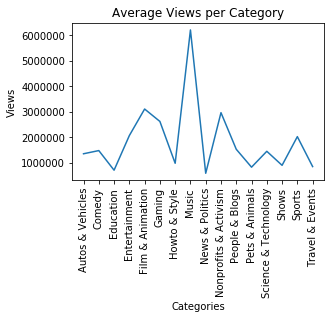

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x1 = group_data.index
y1 = group_data['views']

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Categories')
ax.set_ylabel('Views')
ax.set_title('Average Views per Category')

plt.show()

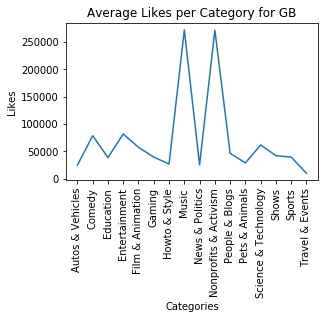

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x1 = group_data_gb.index
y1 = group_data_gb['likes']

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Categories')
ax.set_ylabel('Likes')
ax.set_title('Average Likes per Category for GB')

plt.show()

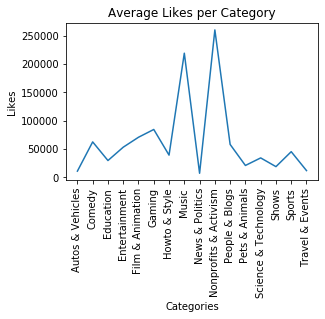

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x1 = group_data.index
y1 = group_data['likes']

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Categories')
ax.set_ylabel('Likes')
ax.set_title('Average Likes per Category')

plt.show()

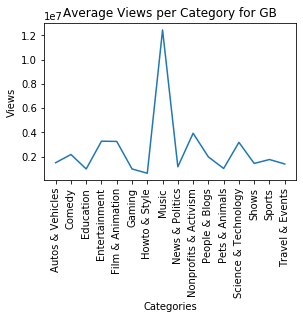

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x1 = group_data_gb.index
y1 = group_data_gb['views']

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Categories')
ax.set_ylabel('Views')
ax.set_title('Average Views per Category for GB')

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = tag_x
Y = data['views']
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

In [3]:
data = pd.read_csv('USvideos.csv')
data.head()
with open('US_category_id.json', 'r') as JSON:
    categories = json.load(JSON)

cat_dict = dict()
for i in range(len(categories['items'])):
    cat_id = categories['items'][i]['id']
    cat_dict[int(cat_id)] = categories['items'][i]['snippet']['title']
    
cat_dict
data['category_id'] = data['category_id'].map(cat_dict)

dummies = pd.get_dummies(data['category_id'])
df = pd.concat([data, dummies], axis = 1)
df.head()
df["descr_len"]= df["description"].str.len()

In [16]:
df_counts = df['category_id'].value_counts().to_frame()
df_counts

,category_id
Entertainment,9964
Music,6472
Howto & Style,4146
Comedy,3457
People & Blogs,3210
News & Politics,2487
Science & Technology,2401
Film & Animation,2345
Sports,2174
Education,1656


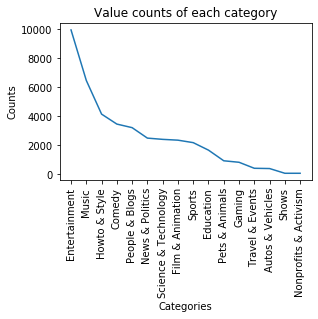

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x1 = df_counts.index
y1 = df_counts['category_id']

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Value counts of each category')

plt.show()

In [18]:
cat_dict
gbdata = pd.read_csv('GBvideos.csv', error_bad_lines=False)


gbdata['category_id'] = gbdata['category_id'].map(cat_dict)

dummies = pd.get_dummies(gbdata['category_id'])
gbdf = pd.concat([gbdata, dummies], axis = 1)
gbdf.head()
gbdf["descr_len"]= gbdf["description"].str.len()

In [19]:
gbdf_counts = gbdf['category_id'].value_counts().to_frame()
gbdf_counts

,category_id
Music,13754
Entertainment,9124
People & Blogs,2926
Film & Animation,2577
Howto & Style,1928
Sports,1907
Comedy,1828
Gaming,1788
News & Politics,1225
Pets & Animals,534


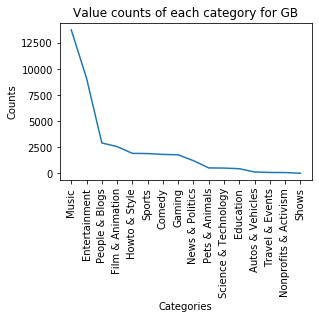

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x1 = gbdf_counts.index
y1 = gbdf_counts['category_id']

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Value counts of each category for GB')

plt.show()